In [1]:
%matplotlib inline
import pandas as pd
import numpy as np 
import seaborn as sns
import os as os
os.environ["PROJ_LIB"] = "/Users/john/miniconda3/share/proj"; #fixr
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import glob

In [25]:
dat = pd.read_csv('data/daily_csvs/2012-01-01.csv')

In [26]:
dat.head()

,date,lat_bin,lon_bin,mmsi,fishing_hours
0,2012-01-01,-28,-1746,441536000,11.631806
1,2012-01-01,-29,-1746,441536000,1.759028
2,2012-01-01,-30,-1745,441536000,2.763750
3,2012-01-01,-30,-1744,441536000,3.645139
4,2012-01-01,-34,636,416121600,4.064861


In [2]:
path = r'data/daily_csvs/' # use your path
allFiles = glob.glob(path + "/*.csv")
allFiles = sorted(allFiles, key=lambda x: x[-13:-4])[0:366]
list_ = []

for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)

dat = pd.concat(list_, axis = 0, ignore_index = True)
dat.to_csv('data/2012_daily_csvs.csv')

In [12]:
dat = pd.read_csv('data/2012_daily_csvs.csv')
dat.head()
#dat.describe()
len(dat.mmsi.value_counts())
dat = dat.groupby(['mmsi'], as_index=False).mean()
dat['lat_bin'] = dat['lat_bin']*.10
dat['lon_bin'] = dat['lon_bin']*.10

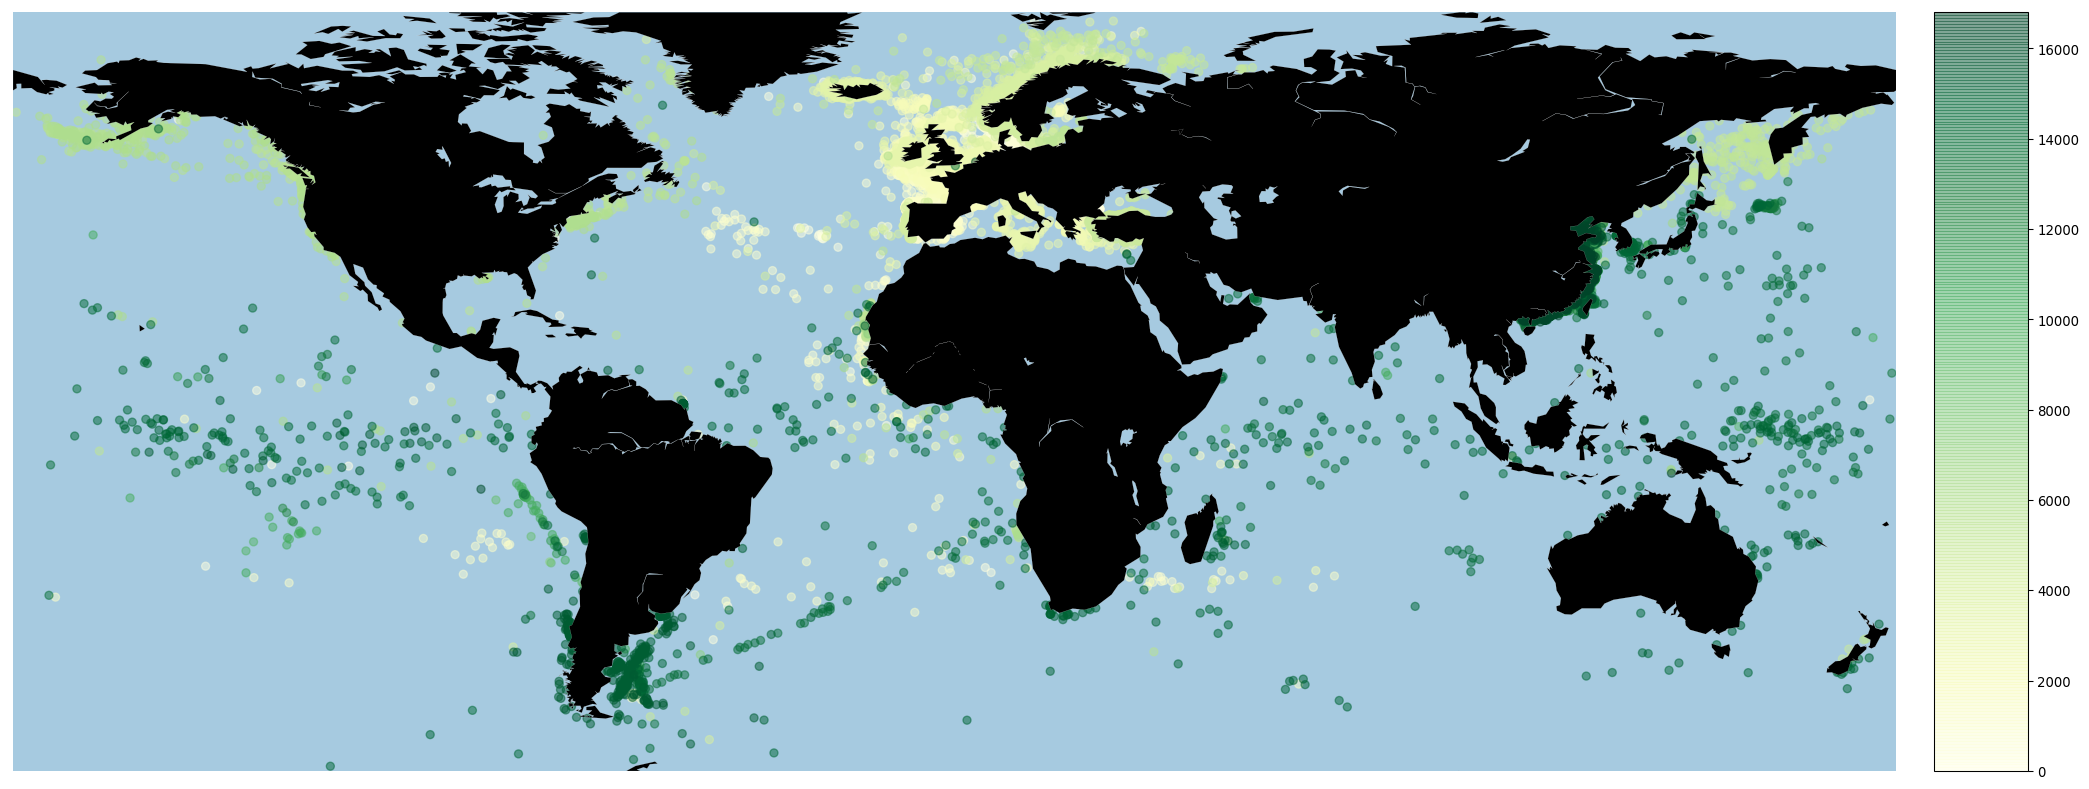

In [37]:
# Set the dimension of the figure
my_dpi=96
plt.figure(figsize=(2600/my_dpi, 1800/my_dpi), dpi=my_dpi)
 
# Make the background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='black', alpha=1)
m.drawcoastlines(linewidth=0.1, color="white")
 
# prepare a color for each point depending on the continent.
dat['fishing_hours'] = pd.factorize(dat['fishing_hours'])[0]

# Add a point per position
m.scatter(dat['lon_bin'], dat['lat_bin'], alpha=0.5, c=dat['fishing_hours'], cmap="YlGn")
 
# Plot color bar
m.colorbar()
plt.show()
